<div class="alert alert-success"><h1>Evaluating a Deep Learning Model in Python</h1></div>

Deep learning has transformed machine learning, driving breakthroughs in computer vision, natural language processing, and speech recognition. In this tutorial, we'll explore the crucial step of evaluating a deep learning model in Python, focusing on metrics that reveal different aspects of model performance. We'll learn to measure predictive accuracy, interpret a confusion matrix, and assess model precision, recall, and the F1-score. These evaluation metrics are essential for understanding a model's strengths and highlighting areas for improvement.

## Learning Objectives
By the end of this tutorial, you will:
+ Know how to load a previously trained Keras model.
+ Know how to compute and visualize a confusion matrix.
+ Understand the structure and components of a confusion matrix.
+ Know how to calculate key performance metrics such as accuracy, precision, recall, and F1-score.
+ Be able to differentiate between precision and recall, understanding the trade-offs between the two.
+ Understand the importance of the F1-score as a balanced metric between precision and recall.


## Prerequisites
Before we begin, ensure you have:

+ Basic knowledge of Python programming (variables, functions, classes).
+ Familiarity with fundamental machine learning concepts (datasets, training/testing, overfitting).
+ A Python (version 3.x) environment with the `tensorflow`, `keras`, `numpy`, `matplotlib`, `seaborn`, and `sklearn` packages installed.

<div class="alert alert-success"><h2>1. Import the Model and Preprocess the Data</h2></div>

To start, we import the deep learning model we trained in the previous tutorial.

In [1]:
from tensorflow import keras

model = keras.models.load_model('nnet_model.keras')

Next, we import the test data, which is new unseen data that our model will be evaluated against.

Recall that the test data is part of the **MNIST dataset**, a classic dataset in the machine learning community. It consists of 70,000 grayscale images of handwritten digits ranging from 0 to 9. Each image is 28x28 pixels, and the dataset is divided into 60,000 training images and 10,000 testing images.

To get the test images and test labels, we call the `keras.datasets.mnist.load_data()` function:

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Note that the function returns both the training and test datasets. We'll ignore the training data for this tutorial.

Our deep learning model expects the test images as a vector of size 784 (i.e. 28 $\times$ 28). So, let's flatten the images.

In [3]:
test_images = test_images.reshape(10000, 28 * 28)

The model also expects the image pixel values scaled. Let's do that as well.

In [4]:
test_images = test_images.astype('float32') / 255

Finally, we also need to one-hot encode the image labels.

In [5]:
num_classes = 10
test_labels = keras.utils.to_categorical(test_labels, num_classes)

<div class="alert alert-success"><h2>2. Predictive Accuracy</h2></div>

After training, it's crucial to assess how well a model is expected to perform against new, unseen data. There are several metrics that provide us with this information. **Predictive accuracy** is one of them. Predictive accuracy is a straightforward metric and is defined as the ratio of correctly predicted instances to the total number of instances in the data. It is a common metric for classification tasks.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

To get the predictve accuracy of our model, we first get the predicted probabilities for each of the test images.

In [6]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Then we convert the probabilities to class labels by selecting the class label with the highest predicted probability using the `argmax()` function from the `numpy` package.

In [7]:
import numpy as np

predicted_classes = np.argmax(predictions, axis = 1)

We do the same thing for the true test labels.

In [8]:
true_classes = np.argmax(test_labels, axis = 1)

With the predicted and true class values, we can use the `accuracy_score()` function provided by `sklearn.metrics` to calculate the accuracy of the model on the test data.

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"The Accuracy of the model on the test images is {accuracy:.4f}.")

The Accuracy of the model on the test images is 0.9801.


A predictive accuracy of 0.9801 means that 98.01% of the predictions made by the model were correct. In other words, out of the 10,000 test images in the data, the model correctly predicted the labels for 9,801 of them, while 199 were misclassified.

Predictive accuracy provides an overall view of how well a model performs on the entire test dataset, giving a general sense of its effectiveness. However, this metric alone may not always reveal important details about the model's weaknesses. To gain deeper insights, it can be useful to examine specific instances where the model made errors.

One way to do this is by identifying and analyzing misclassified examples (i.e. those cases where the model's predictions differ from the true labels). By visualizing a few of these misclassified images, along with their actual and predicted labels, we can better understand patterns in the model's mistakes and identify areas for improvement.

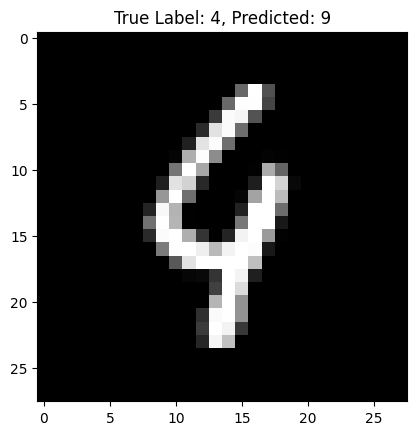

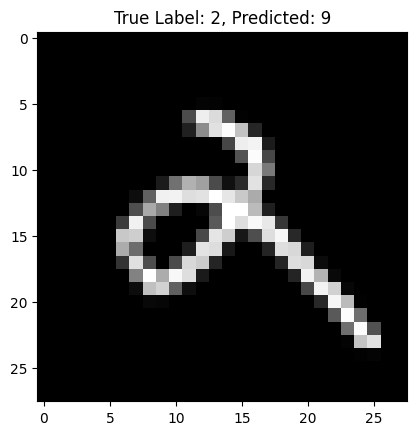

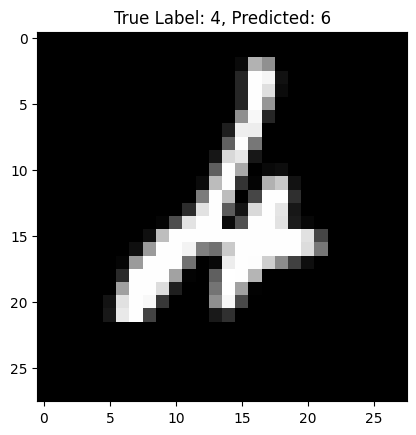

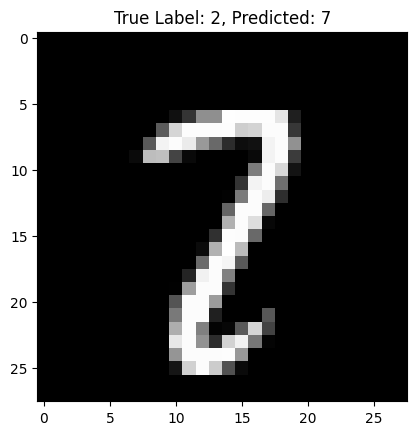

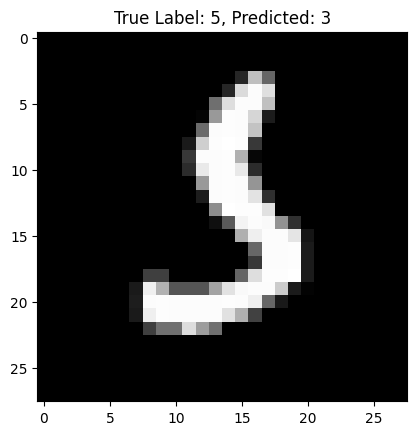

In [10]:
import matplotlib.pyplot as plt
misclassified_images = np.where(predicted_classes != true_classes)[0]

for i in misclassified_images[:5]:
    plt.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f'True Label: {true_classes[i]}, Predicted: {predicted_classes[i]}')
    plt.show()

<div class="alert alert-success"><h2>3. Confusion Matrix</h2></div>

A **confusion matrix** provides additional insight into the performance of a model by summarizing how well the model does in classifying each label. This can help us, for instance, identify if there are digits which are commonly misclassified by the model.

To create a confusion matrix for our model, we first use the `confusion_matrix()` function from `sklearn.metrics` to calculate the values of the matrix.

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_classes, predicted_classes)

Then we visualize the matrix as a heatmap.

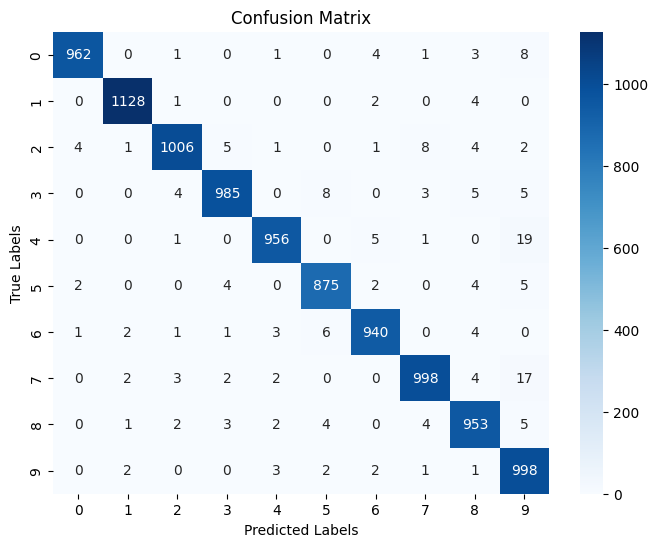

In [12]:
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The diagonal elements of the confusion matrix represent the number of correct predictions for each label, while the off-diagonal elements represent misclassifications.

Overall, the model performs exceptionally well in correctly classifying most images. However, we do observe that the model occasionally confuses '4' for '9' (19 instances) and '7' for '9' (17 instances). While these are relatively minor errors compared to the 956 correctly classified images of the number '4' and the 998 correctly classified images of the number '7', it may be worth investigating further to identify potential areas for improvement.